# <center>THE BIG BANG THEORY</center>


<div style="display: flex; align-items: center;">
    <img src="https://upload.wikimedia.org/wikipedia/en/thumb/7/7b/The_Big_Bang_Theory_%28Official_Title_Card%29.png/330px-The_Big_Bang_Theory_%28Official_Title_Card%29.png" alt="The Big Bang Theory" style="width: 200px;"/>
    <p style="margin-left: 20px;">
        <strong><em>"The Big Bang Theory"</em></strong> is a beloved American television sitcom created by Chuck Lorre and Bill Prady. Originally airing from September 24, 2007, to May 16, 2019, spanning twelve seasons, the show has left an indelible mark on audiences worldwide. Personally, it holds a special place in my heart as a cherished part of our morning breakfast routine for a while. Countless mornings were spent enjoying the witty humor, clever writing, and endearing characters, especially the socially awkward but brilliant physicists at Caltech University. As a fan, I've lost track of how many times I've rewatched episodes, finding comfort and joy in the familiar jokes and camaraderie. And while I dont want to spoil the ending for those who haven't seen it, I'll just say that the series finale left me feeling immensely satisfied. "The Big Bang Theory" remains a timeless classic, continuing to bring laughter and warmth to viewers worldwide.
    </p>
</div>





## Extracting Data Frame by using Web Scraping

Here we performed **web scraping methods** on _"The Big Bang Theory"_ Wikipedia page to extract some data and organize them into a DataFrame for further analysis.

In [26]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

# URL of the Wikipedia page
url = 'https://en.wikipedia.org/wiki/The_Big_Bang_Theory'

# Fetch the HTML content of the Wikipedia page
response = requests.get(url)
if response.status_code == 200:
    html_content = response.text
else:
    print("Failed to retrieve page")

# Parse the HTML content
soup = BeautifulSoup(html_content, 'html.parser')

# Find the table containing viewership statistics
table = soup.find('table', {'class': 'wikitable plainrowheaders'})

# Extract data from the table
data = []
for row in table.find_all('tr'):
    columns = row.find_all(['th', 'td'])
    if len(columns) == 8:  # Ensure it's a data row
        season = columns[0].text.strip()
        episodes = columns[1].text.strip()
        # Extract year from First aired and format them as 'YYYY'
        year = re.search(r'\d{4}', columns[2].text.strip()).group()
        # Remove brackets and their contents from viewers rank and 18-49 rank
        viewers_rank = re.sub(r'\[.*?\]', '', columns[4].text.strip())
        viewers_million = re.sub(r'\[.*?\]', '', columns[5].text.strip())
        _18_49_rank = re.sub(r'\[.*?\]', '', columns[6].text.strip())
        data.append((season, episodes, year, viewers_rank, viewers_million, _18_49_rank))

# Create DataFrame from the extracted data
df = pd.DataFrame(data, columns=['Season', 'Episodes', 'Year', 'Viewers_Rank', 'U.S._Viewers_(millions)', '18–49_rank'])

# Print DataFrame
print(df)


   Season Episodes  Year Viewers_Rank U.S._Viewers_(millions) 18–49_rank
0       1       17  2007           68                    8.34         46
1       2       23  2008           40                   10.07          —
2       3       23  2009           12                   14.22          5
3       4       24  2010           13                   13.21          7
4       5       24  2011            8                   15.82          6
5       6       24  2012            3                   18.68          2
6       7       24  2013            2                   19.96          2
7       8       24  2014            2                   19.05          4
8       9       24  2015            2                   20.36          3
9      10       24  2016            2                   18.99          3
10     11       24  2017            1                   18.63          5
11     12       24  2018            2                   17.31          6


## Data Pre-processing
This section of the project focuses on converting the data type to numeric for statistical analyses. This is necessary for further analysis and visualization of viewership data. In addition we check empt values and replaced it as well. 


In [27]:

# List of columns to convert to numeric
numeric_cols = ['Season', 'Episodes', 'Year', 'Viewers_Rank', 'U.S._Viewers_(millions)', '18–49_rank']

# Convert columns to numeric data types
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Print DataFrame info to check data types
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Season                   12 non-null     int64  
 1   Episodes                 12 non-null     int64  
 2   Year                     12 non-null     int64  
 3   Viewers_Rank             12 non-null     int64  
 4   U.S._Viewers_(millions)  12 non-null     float64
 5   18–49_rank               11 non-null     float64
dtypes: float64(2), int64(4)
memory usage: 708.0 bytes
None


In [53]:
# Replace '—' with NaN
df.replace('—', pd.NA, inplace=True)

### Summary Statistics

The summary statistics reveal key insights into "The Big Bang Theory's" viewership trends. With a wide range of viewership rankings, the show maintained significant popularity throughout its twelve-season run. **Season 9** stood out with a peak of **20.36 million viewers in the U.S.**, indicating widespread appeal. 
A high standard deviation in both Viewers_Rank and 18–49 rank suggests fluctuations not only in demographic engagement but also in general popularity across seasons.In essence, the variability in both ranks indicates that the show's popularity was not consistent throughout its run. Fluctuations in both demographic engagement (as represented by the 18–49 rank) and general popularity (as represented by the Viewers_Rank) imply that viewership patterns changed over time. These fluctuations could be influenced by various factors such as storyline developments, competition from other shows, or changes in viewers' preferences.

In [54]:
summary_stats = df.describe(include='all')
print(summary_stats)


          Season   Episodes         Year  Viewers_Rank  \
count  12.000000  12.000000    12.000000     12.000000   
mean    6.500000  23.250000  2012.500000     12.916667   
std     3.605551   2.005674     3.605551     20.513669   
min     1.000000  17.000000  2007.000000      1.000000   
25%     3.750000  23.750000  2009.750000      2.000000   
50%     6.500000  24.000000  2012.500000      2.500000   
75%     9.250000  24.000000  2015.250000     12.250000   
max    12.000000  24.000000  2018.000000     68.000000   

       U.S._Viewers_(millions)  18–49_rank  
count                12.000000   11.000000  
mean                 16.220000    8.090909  
std                   3.965692   12.684278  
min                   8.340000    2.000000  
25%                  13.967500    3.000000  
50%                  17.970000    5.000000  
75%                  19.005000    6.000000  
max                  20.360000   46.000000  


## Data Visualization

### 1. Analyzing the U.S. Viewership: Exploring Peak Seasons and Trends  for The Big Bang Theory

We first explored peak seasons and trends in U.S. viewership for "The Big Bang Theory" because we wanted to understand the show's trajectory over its twelve-season history. By identifying peak seasons and analyzing viewership trends, we aimed to uncover pivotal moments of audience engagement and track how viewership evolved over time. This historical analysis helps us contextualize the show's success and provides insights into the factors influencing audience interest.

The graph below shows that the U.S. viewership trends across seasons reveals a consistent upward trajectory, as depicted by the linear trend line. This indicates a progressive increase in popularity for "The Big Bang Theory" over its twelve-season span, with occasional downturns interspersed. Notably, three seasons stand out as peak periods of viewership: *Season 9 (2015) with 20.36 million viewers, Season 7 (2013) with 19.96 million viewers, and Season 8 (2014) with 19.05 million viewers*. These peaks may be attributed to significant events within the series, such as pivotal plot twists, character developments, or promotional activities. Further investigation into the correlation between these events and viewership peaks could offer insights into audience engagement dynamics. Overall, the analysis underscores the show's enduring success in captivating and retaining audiences, punctuated by distinct periods of heightened interest.

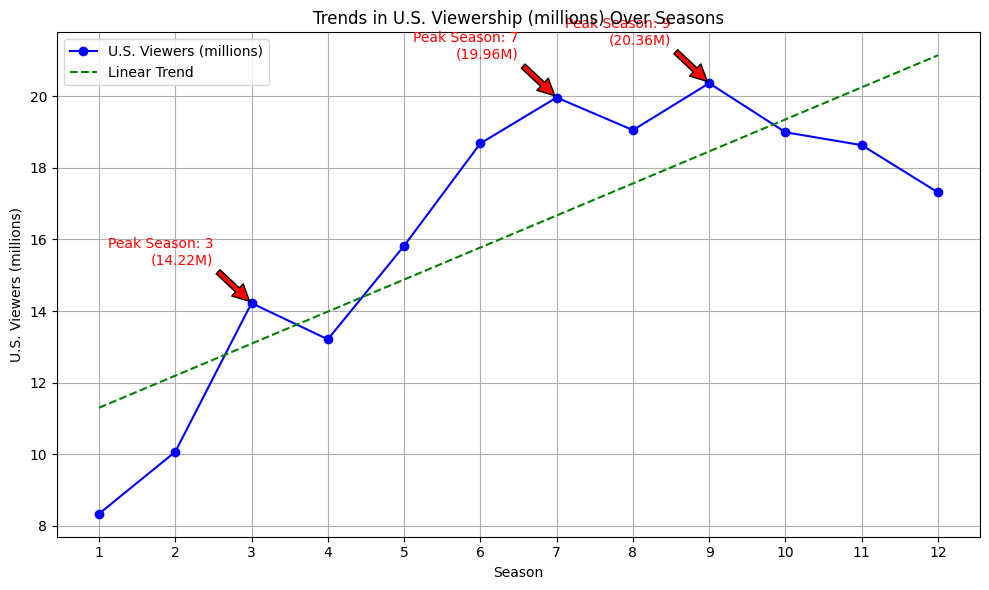

In [55]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Prepare the Data
seasons = df['Season']
viewers_millions = df['U.S._Viewers_(millions)']

# Create a Line Plot
plt.figure(figsize=(10, 6))
plt.plot(seasons, viewers_millions, marker='o', color='blue', linestyle='-', label='U.S. Viewers (millions)')

# Fit linear regression
X = np.array(seasons).reshape(-1, 1)
y = viewers_millions.values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
trend_line = reg.predict(X)
plt.plot(seasons, trend_line, color='green', linestyle='--', label='Linear Trend')

# Add labels and title
plt.title('Trends in U.S. Viewership (millions) Over Seasons')
plt.xlabel('Season')
plt.ylabel('U.S. Viewers (millions)')
plt.legend()

# Show peak points
for i in range(1, len(seasons) - 1):
    if viewers_millions[i] > viewers_millions[i - 1] and viewers_millions[i] > viewers_millions[i + 1]:
        # Peak found, now check if there is a decrease in viewership in later seasons
        later_seasons = viewers_millions[i + 1:]
        if later_seasons.min() < viewers_millions[i]:
            # There is a decrease, annotate the peak
            plt.annotate(f'Peak Season: {i + 1}\n({viewers_millions[i]}M)', 
                         xy=(i+ 1, viewers_millions[i]),
                         xytext=(i + 0.5, viewers_millions[i] + 1),
                         arrowprops=dict(facecolor='red', shrink=0.05),
                         horizontalalignment='right',
                         verticalalignment='bottom', color ='red')

# Show the plot
plt.grid(True)
plt.xticks(range(1, len(seasons) + 1))
plt.tight_layout()
plt.show()


### 2. Analyzing the Ranks: A Comparative Study of Viewers Rankings and 18–49 Rankings

We delved into analyzing viewership trends in "The Big Bang Theory" through a comparative study of viewers and 18–49 rankings to gain a comprehensive understanding of its audience demographics and popularity among key demographic segments. By examining both viewership and 18–49 rankings, we aimed to discern any correlations or disparities between overall viewership and viewership within the key 18–49 demographic. This comparative analysis enables us to discern patterns in audience engagement and identify the show's relative appeal to different viewer demographics over its twelve-season run.

The graphs illustrate the Viewers Rank and 18–49 Rank trends across the seasons of "The Big Bang Theory."  Both the Viewers Rank and 18–49 Rank show peaks denoting periods of high viewership,  While the Viewers Rank exhibits greater variability across seasons, suggesting fluctuations in overall popularity, the 18–49 Rank remains relatively stable. 
However, both metrics demonstrate a consistent downward trend, indicative of increasing popularity. Despite fluctuations, the overall decline in rankings suggests sustained viewer interest throughout the series, reaffirming the show's enduring appeal and impact.

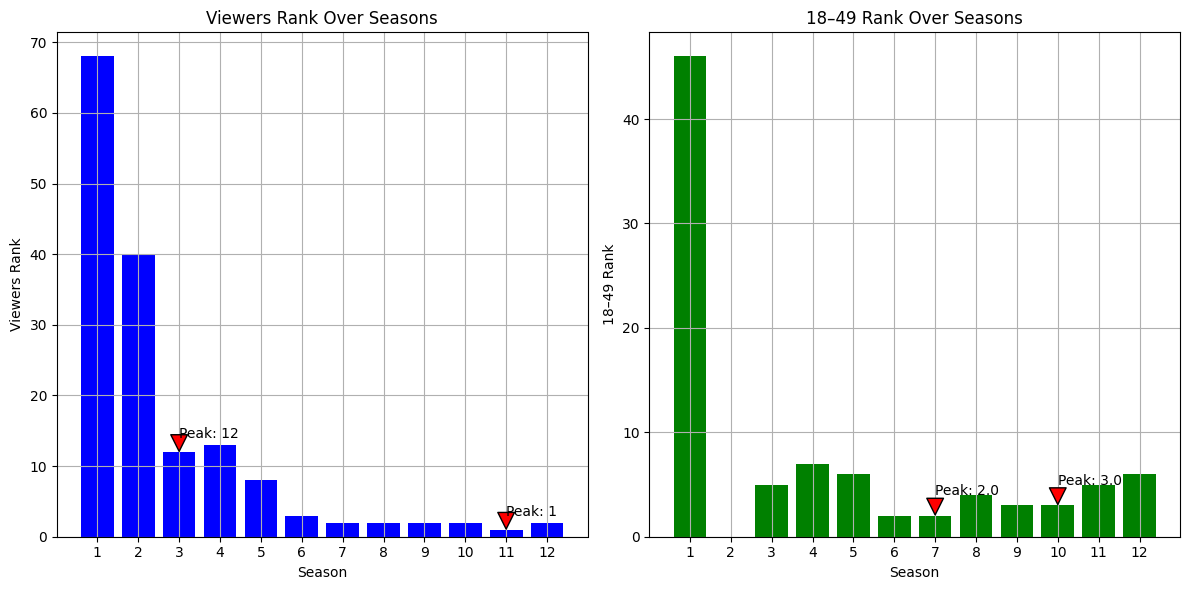

In [82]:
# Prepare the Data
viewers_rank = df['Viewers_Rank']
_18_49_rank = df['18–49_rank']

# Create Bar Plots for Viewers Rank and 18–49 Rank
plt.figure(figsize=(12, 6))

# Plot Viewers Rank
plt.subplot(1, 2, 1)
plt.bar(seasons, viewers_rank, color='blue')
plt.title('Viewers Rank Over Seasons')
plt.xlabel('Season')
plt.ylabel('Viewers Rank')
plt.grid(True)
plt.xticks(range(1, len(seasons) + 1))

# Annotate peak points for Viewers Rank
for i in range(1, len(seasons) - 1):
    if viewers_rank[i] < viewers_rank[i - 1] and viewers_rank[i] < viewers_rank[i + 1]:
        plt.annotate(f'Peak: {viewers_rank[i]}', xy=(i+1, viewers_rank[i]),
                     xytext=(i+1 , viewers_rank[i] + 2), arrowprops=dict(facecolor='red', shrink=0.05))

# Plot 18–49 Rank
plt.subplot(1, 2, 2)
plt.bar(seasons, _18_49_rank, color='green')
plt.title('18–49 Rank Over Seasons')
plt.xlabel('Season')
plt.ylabel('18–49 Rank')
plt.grid(True)
plt.xticks(range(1, len(seasons) + 1))

# Annotate peak points for 18–49 Rank
for i in range(1, len(seasons) - 1):
    if _18_49_rank[i] <= _18_49_rank[i - 1] and _18_49_rank[i] < _18_49_rank[i + 1]:
        plt.annotate(f'Peak: {_18_49_rank[i]}', xy=(i+1 , _18_49_rank[i]),
                     xytext=(i+1 , _18_49_rank[i] + 2), arrowprops=dict(facecolor='red', shrink=0.05))
plt.tight_layout()
plt.show()

### 3. Analyzing Viewer Dynamics: Percentage Changes and Correlation

Utilizing percentage change graphs, we aimed to uncover underlying patterns and comparative trends across variables of varied scales. Our foremost anticipation was to uncover a negative correlation between surging viewership and diminishing ranks, indicative of heightened popularity. Additionally, we sought to elucidate any linkages between viewers rank and the 18–49 rank.

Though the graphs may appear intricate at first glance, a discernible negative correlation emerges between U.S. viewership numbers and both viewers rank and the 18–49 rank. Moreover, a positive correlation is discernible between viewers rank and the 18–49 rank, suggesting a degree of congruence between overall viewership rank and rank within the 18–49 demographic, albeit less pronounced than with U.S. viewership numbers. To validate these findings, we proceeded to delve into correlation analyses in the subsequent phase.

Correlation analyses unveil robust negative correlations between U.S. viewership numbers and both viewers rank and the 18–49 rank as expected. Furthermore, a positive correlation is evident between viewers rank and the 18–49 rank, indicating some alignment between overall viewership rank and rank within the 18–49 demographic, albeit less pronounced than with U.S. viewership numbers.

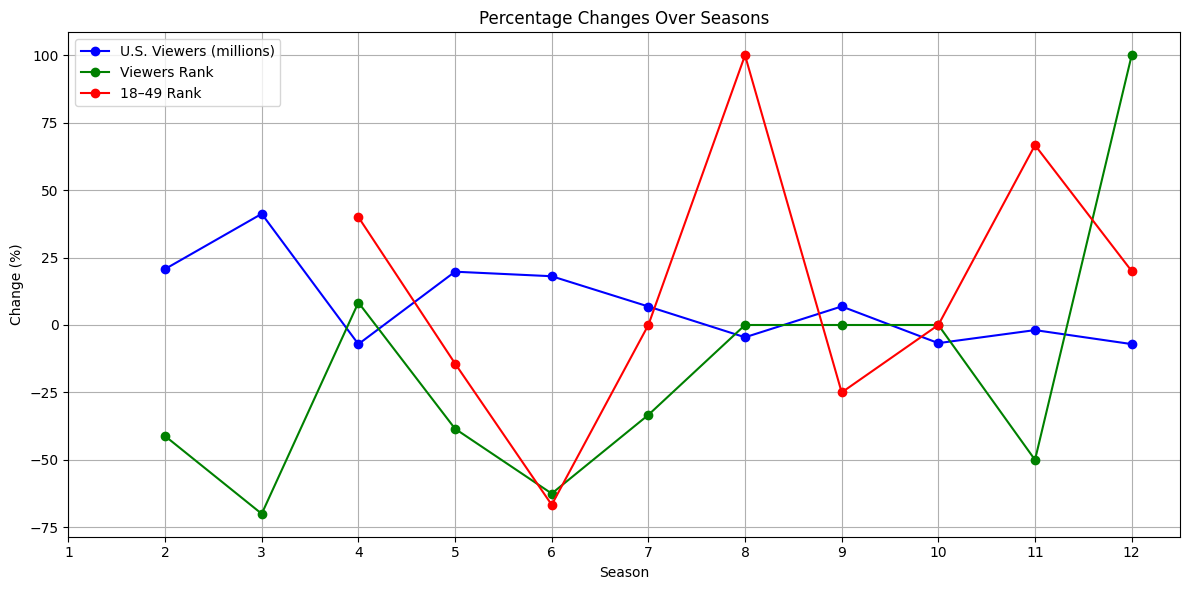

In [86]:
# Calculate percentage changes for 'U.S. Viewers (millions)', 'Viewers_Rank', and '18–49_rank'
us_viewers_changes_percentage = df['U.S._Viewers_(millions)'].pct_change(fill_method=None) * 100
viewers_rank_changes_percentage = df['Viewers_Rank'].pct_change(fill_method=None) * 100
_18_49_rank_changes_percentage = df['18–49_rank'].pct_change(fill_method=None) * 100

# Create a single plot
plt.figure(figsize=(12, 6))

# Plot percentage changes for 'U.S. Viewers (millions)'
plt.plot(seasons, us_viewers_changes_percentage, marker='o', color='blue', linestyle='-', label='U.S. Viewers (millions)')

# Plot percentage changes for 'Viewers_Rank'
plt.plot(seasons, viewers_rank_changes_percentage, marker='o', color='green', linestyle='-', label='Viewers Rank')

# Plot percentage changes for '18–49_rank'
plt.plot(seasons, _18_49_rank_changes_percentage, marker='o', color='red', linestyle='-', label='18–49 Rank')


# Add labels and title
plt.title('Percentage Changes Over Seasons')
plt.xlabel('Season')
plt.ylabel('Change (%)')
plt.legend()

plt.grid(True)
plt.xticks(range(1, len(seasons) + 1))
plt.tight_layout()
plt.show()


In [93]:
# Calculate the correlation matrix for percentage changes
correlation_matrix = df[['U.S._Viewers_(millions)', 'Viewers_Rank', '18–49_rank']].pct_change(fill_method=None).corr()

# Print the correlation matrix
print("Correlation Coefficients (for change %):")
print(correlation_matrix)


Correlation Coefficients (for change %):
                         U.S._Viewers_(millions)  Viewers_Rank  18–49_rank
U.S._Viewers_(millions)                 1.000000     -0.684453   -0.697043
Viewers_Rank                           -0.684453      1.000000    0.246052
18–49_rank                             -0.697043      0.246052    1.000000


In [91]:
# Calculate correlation coefficients for values
correlation_coefficients = df[['U.S._Viewers_(millions)', 'Viewers_Rank', '18–49_rank']].corr()

# Print correlation coefficients
print("Correlation Coefficients:")
print(correlation_coefficients)

Correlation Coefficients:
                         U.S._Viewers_(millions)  Viewers_Rank  18–49_rank
U.S._Viewers_(millions)                 1.000000     -0.904321   -0.831210
Viewers_Rank                           -0.904321      1.000000    0.984527
18–49_rank                             -0.831210      0.984527    1.000000
